# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 2: Prediction using Unsupervised ML

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### 1. Importing the required header files 

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

### 2. Reading the data

In [ ]:
#Dataset : https://bit.ly/3kXTdox

#Reading the csv file using pandas library
data = pd.read_csv('Iris.csv')
#Printing shape of data
print(data.shape)
#Displaying 5 records
data.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* There are only 150 records and 6 features in our dataset, in which 4 features are independent and one is dependent feature i.e. Species.
* Fetaure Id is just unique value for all etries, hence this feature is not required.

In [ ]:
#Removing Id feature
data = data.drop('Id', axis=1)

In [ ]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* There are total of 150 entries in data and all are not null.

In [ ]:
#Basic description about the data such as count, mean, std, etc.
#The below details is only for numerical fields of data(In our case all columns are numerical). 
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print('There are 3 unique classes which are:',set(data['Species'].values))

There are 3 unique classes which are: {'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [ ]:
#Replacing 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa' as 0,1,2 for visualizing the data w.r.t class as numerical data can be visualized better.

data['Species'].loc[data['Species'] == 'Iris-versicolor'] = 0
data['Species'].loc[data['Species'] == 'Iris-virginica'] = 1
data['Species'].loc[data['Species'] == 'Iris-setosa'] = 2

In [ ]:
print('There are 3 unique classes which are:',set(data['Species'].values))

There are 3 unique classes which are: {0, 1, 2}


### 3. Preparing the data

In [ ]:
#Picking features and class variable
y = data['Species'].values
x = data.drop('Species', axis=1)

### 4. Data Visualization

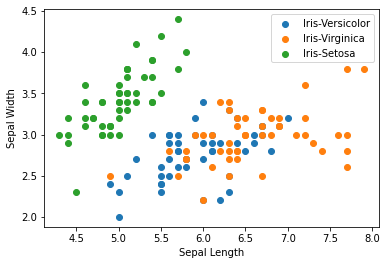

In [ ]:
#Visualizing different iris flower w.r.t sepal length & width

plt.scatter(x['SepalLengthCm'].values[[i for i, value in enumerate(y) if value == 0]],\
            x['SepalWidthCm'].values[[i for i, value in enumerate(y) if value == 0]], label = 'Iris-Versicolor')
plt.scatter(x['SepalLengthCm'].values[[i for i, value in enumerate(y) if value == 1]],\
            x['SepalWidthCm'].values[[i for i, value in enumerate(y) if value == 1]], label = 'Iris-Virginica')
plt.scatter(x['SepalLengthCm'].values[[i for i, value in enumerate(y) if value == 2]],\
            x['SepalWidthCm'].values[[i for i, value in enumerate(y) if value == 2]], label = 'Iris-Setosa')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

* Feature sepal length and width somehow separates the data to their class but still there is high overlap for versicolor and verginica class.

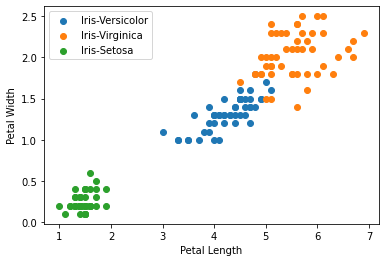

In [ ]:
#Visualizing different iris flower w.r.t petal length & width

plt.scatter(x['PetalLengthCm'].values[[i for i, value in enumerate(y) if value == 0]],\
            x['PetalWidthCm'].values[[i for i, value in enumerate(y) if value == 0]], label = 'Iris-Versicolor')
plt.scatter(x['PetalLengthCm'].values[[i for i, value in enumerate(y) if value == 1]],\
            x['PetalWidthCm'].values[[i for i, value in enumerate(y) if value == 1]], label = 'Iris-Virginica')
plt.scatter(x['PetalLengthCm'].values[[i for i, value in enumerate(y) if value == 2]],\
            x['PetalWidthCm'].values[[i for i, value in enumerate(y) if value == 2]], label = 'Iris-Setosa')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

* Feature petal length and width well separtes each class although there is little ovelap between class versicolor and verginica.
* Petal length and width are more important feature than sepal length and width.

### 5. Applying unsupervised ML Algorithm(Lets pick K-Means Clustering)

In [ ]:
from sklearn.cluster import KMeans

inertia = []
#Experimented with difeerent numbers of clusters as it is unsupervised ML problem
for i in range(1, 10):
    km = KMeans(n_clusters = i)
    km.fit(x)
    inertia.append(km.inertia_) #Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are)

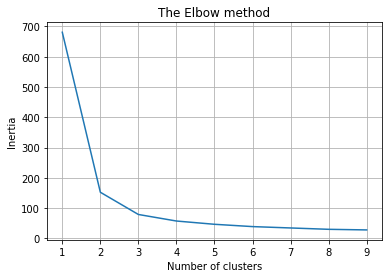

In [ ]:
#Plotting a graph which shows the 'elbow' i.e. a point after the graph changes from exponential to linear
#Elbow method is used to find the optimal number of clusters
#Elbow here is similar as human elbow structure where a after the graph changes from exponential to linear are considered as best cluster.

plt.plot(range(1, 10), inertia)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

* As we can see in the above graph, elbow point is 3 because after that graph is getting linear.
* Hence, optimal number of cluster is 3.


### 6. Fitting the K-Means Clustering model with optimal number of cluster i.e. 3

In [ ]:
km = KMeans(n_clusters = 3)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Predicting the clusters with optimal model
pred = km.predict(x)

### 7. Visualizing the clusters predicted by K-Means Clustering model

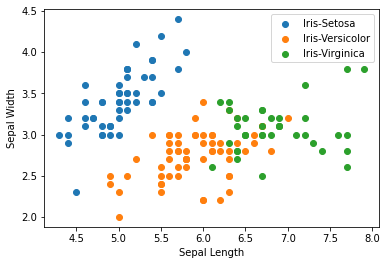

In [ ]:
#Visualizing different iris flower w.r.t sepal length & width and giving label to each clusters manually

plt.scatter(x['SepalLengthCm'].values[[i for i, value in enumerate(pred) if value == 0]],\
            x['SepalWidthCm'].values[[i for i, value in enumerate(pred) if value == 0]], label = 'Iris-Setosa')
plt.scatter(x['SepalLengthCm'].values[[i for i, value in enumerate(pred) if value == 1]],\
            x['SepalWidthCm'].values[[i for i, value in enumerate(pred) if value == 1]], label = 'Iris-Versicolor')
plt.scatter(x['SepalLengthCm'].values[[i for i, value in enumerate(pred) if value == 2]],\
            x['SepalWidthCm'].values[[i for i, value in enumerate(pred) if value == 2]], label = 'Iris-Virginica')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

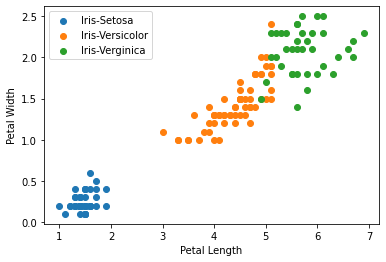

In [ ]:
#Visualizing different iris flower w.r.t petal length & width and giving label to each clusters manually

plt.scatter(x['PetalLengthCm'].values[[i for i, value in enumerate(pred) if value == 0]],\
            x['PetalWidthCm'].values[[i for i, value in enumerate(pred) if value == 0]], label = 'Iris-Setosa')
plt.scatter(x['PetalLengthCm'].values[[i for i, value in enumerate(pred) if value == 1]],\
            x['PetalWidthCm'].values[[i for i, value in enumerate(pred) if value == 1]], label = 'Iris-Versicolor')
plt.scatter(x['PetalLengthCm'].values[[i for i, value in enumerate(pred) if value == 2]],\
            x['PetalWidthCm'].values[[i for i, value in enumerate(pred) if value == 2]], label = 'Iris-Verginica')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

### 8. Conclusion

* Feature petal length and width is most imprtant feature for classification task in iris dataset.
* Optimal K-Means clustering is able to classify the iris species and we are also able to visualize them with the help of scatter plot.